In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import seaborn as sns


from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
82,5.8,2.7,3.9,1.2,versicolor
72,6.3,2.5,4.9,1.5,versicolor
86,6.7,3.1,4.7,1.5,versicolor
63,6.1,2.9,4.7,1.4,versicolor
148,6.2,3.4,5.4,2.3,virginica


In [4]:
#df['species']=df['species'].map({'virginica':0,'versicolor':1,'setosa':2})

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# missing value check

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# number of species

In [7]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

# data visualization

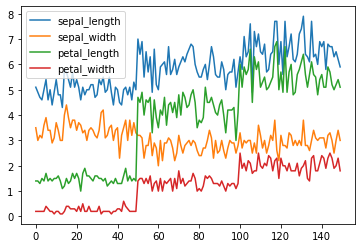

In [8]:
df.plot()

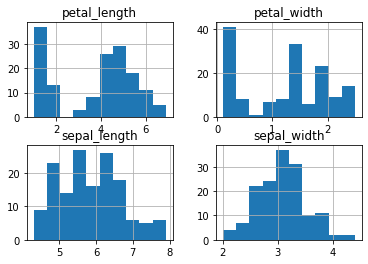

In [9]:
df.hist()
plt.show()

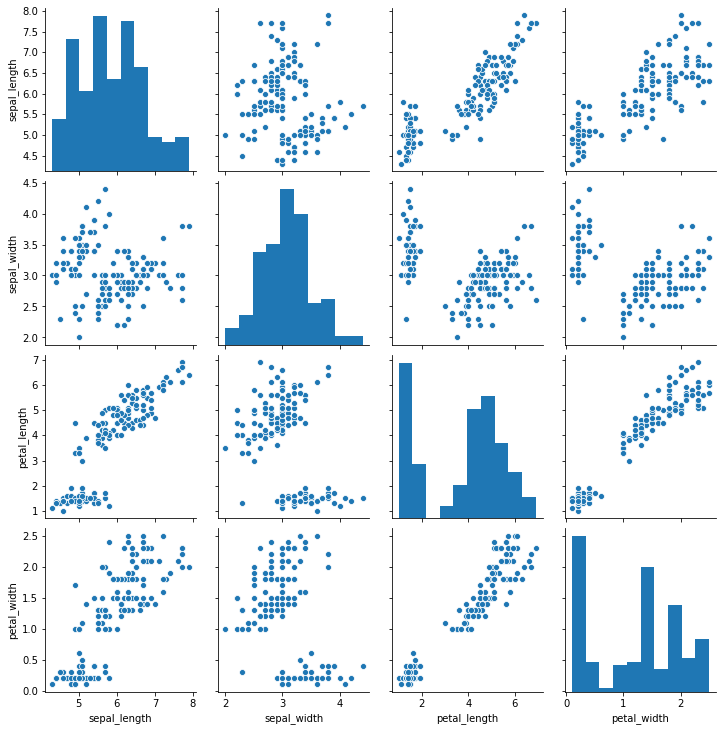

In [10]:
sns.pairplot(df)

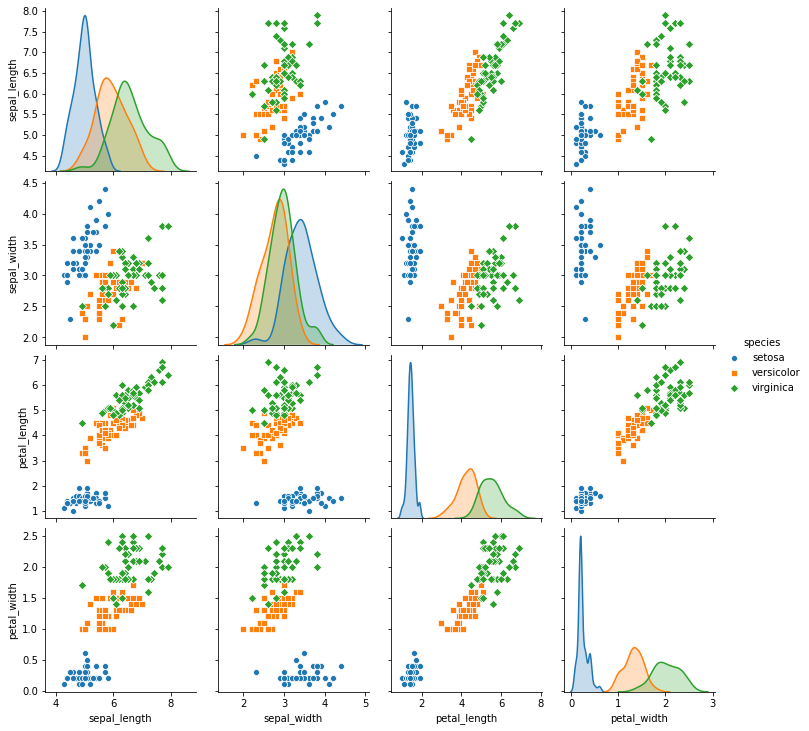

In [11]:
sns.pairplot(df,markers=["o","s","D"],hue="species")

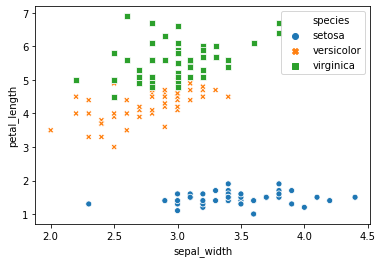

In [12]:
sns.scatterplot(x="sepal_width",y="petal_length",hue="species",data=df,style="species")

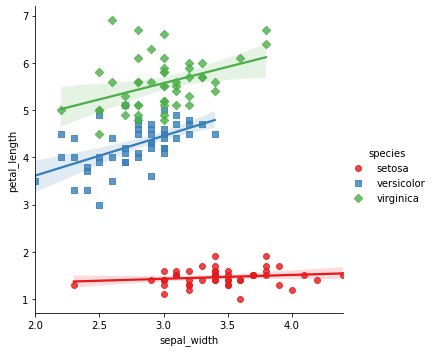

In [13]:
sns.lmplot(x="sepal_width",y="petal_length",hue="species",data=df,palette="Set1",markers=["o","s","D"])

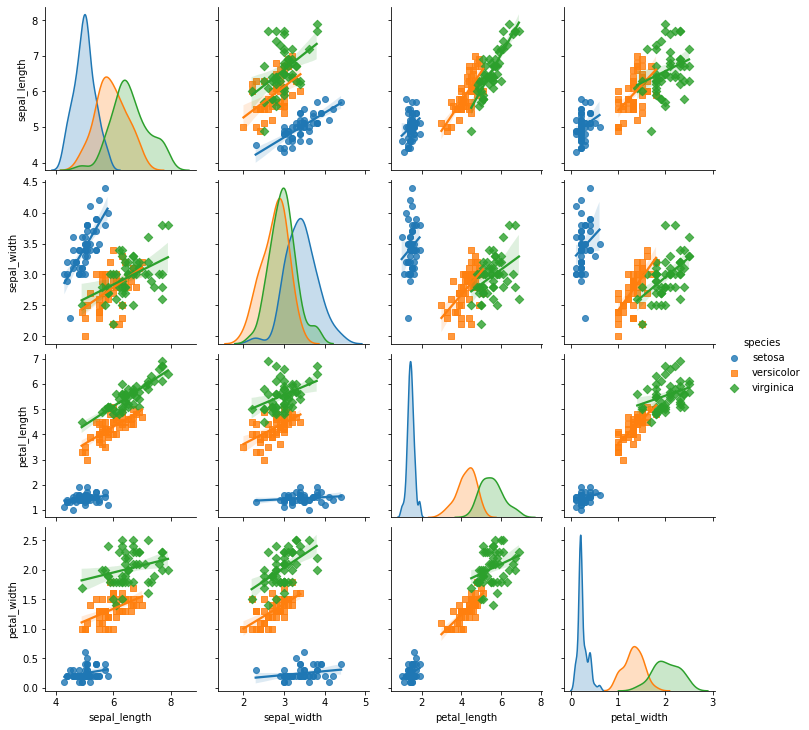

In [14]:
sns.pairplot(df,kind="reg",markers=["o","s","D"],hue="species")

In [15]:
x = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)


# models

In [16]:
models=[]
models.append(("PassiveAggressiveClassifier",PassiveAggressiveClassifier()))
models.append(("LinearDiscriminantAnalysis",LinearDiscriminantAnalysis()))
models.append(("DecisionTreeClassifier",DecisionTreeClassifier()))
models.append(("RandomForestClassifier",RandomForestClassifier()))
models.append(("KNeighborsClassifier",KNeighborsClassifier()))
models.append(("LogisticRegression",LogisticRegression()))
models.append(("AdaBoostClassifier",AdaBoostClassifier()))                                                           
models.append(("SGDClassifier",SGDClassifier()))
models.append(("SVM",SVC()))

In [17]:
for model_name, model in models:
    model.fit(x_train,y_train)
    prd=model.predict(x_test)
    acc=accuracy_score(y_test,prd)
    print(model_name,"Accuracy : ",acc)
    print()
    print("Confusion Matrix")
    print(confusion_matrix(y_test,prd))
    print()
    print(classification_report(y_test,prd))
    

PassiveAggressiveClassifier Accuracy :  0.868421052631579

Confusion Matrix
[[20  0  0]
 [ 1  2  4]
 [ 0  0 11]]

              precision    recall  f1-score   support

      setosa       0.95      1.00      0.98        20
  versicolor       1.00      0.29      0.44         7
   virginica       0.73      1.00      0.85        11

    accuracy                           0.87        38
   macro avg       0.90      0.76      0.76        38
weighted avg       0.90      0.87      0.84        38

LinearDiscriminantAnalysis Accuracy :  1.0

Confusion Matrix
[[20  0  0]
 [ 0  7  0]
 [ 0  0 11]]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      1.00      1.00         7
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

DecisionTreeClassifier Ac

C:\Users\tasli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy :  1.0

Confusion Matrix
[[20  0  0]
 [ 0  7  0]
 [ 0  0 11]]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      1.00      1.00         7
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

AdaBoostClassifier Accuracy :  0.9736842105263158

Confusion Matrix
[[20  0  0]
 [ 0  7  0]
 [ 0  1 10]]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.96        38
weighted avg       0.98      0.97      0.97        38

SGDClassifier Accuracy :  0.8157894736842

C:\Users\tasli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Crossed Validation

In [18]:
for models_name, model in models:
    kfold=KFold(n_splits=10,random_state=42)
    acc=cross_val_score(model,x_train, y_train, cv=kfold, scoring='accuracy')
    print(models_name,"accuracy",acc.mean())

C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


PassiveAggressiveClassifier accuracy 0.8492424242424242


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LinearDiscriminantAnalysis accuracy 0.9727272727272727


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


DecisionTreeClassifier accuracy 0.9287878787878787


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RandomForestClassifier accuracy 0.9287878787878787


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNeighborsClassifier accuracy 0.9553030303030303


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\tasli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tasli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

LogisticRegression accuracy 0.9553030303030303


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AdaBoostClassifier accuracy 0.9106060606060605


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SGDClassifier accuracy 0.8045454545454545


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM accuracy 0.9553030303030303


# model test by unknown data

In [19]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.predict([[1,2,3,4]])

C:\Users\tasli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['virginica'], dtype=object)